In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
ssdf = pd.read_csv("Skyserver.csv")
ssdf.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,-0.000009,3306,54922,491,STAR
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,-0.000055,323,51615,541,STAR
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,0.123111,287,52023,513,GALAXY
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,-0.000111,3306,54922,510,STAR
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,0.000590,3306,54922,512,STAR


In [3]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
 17  class      10000 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Fortunately only class column is object type and there are no null values in any columns.

In [4]:
ssdf.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.644890e+18,0.143726,1460.986400,52943.533300,353.069400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013758e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000


There is nothing much to see form it, some columns have outiers as their inter quartiles range are very large.

In [5]:
ssdf.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

In [6]:
print(ssdf['redshift'].value_counts())

 0.000000    19
-0.000020     6
-0.000062     5
-0.000010     4
-0.000033     4
             ..
 0.060941     1
 1.269727     1
 1.912334     1
-0.000522     1
-0.000424     1
Name: redshift, Length: 9637, dtype: int64


Let's visualize the dataset by plotting some graphs.

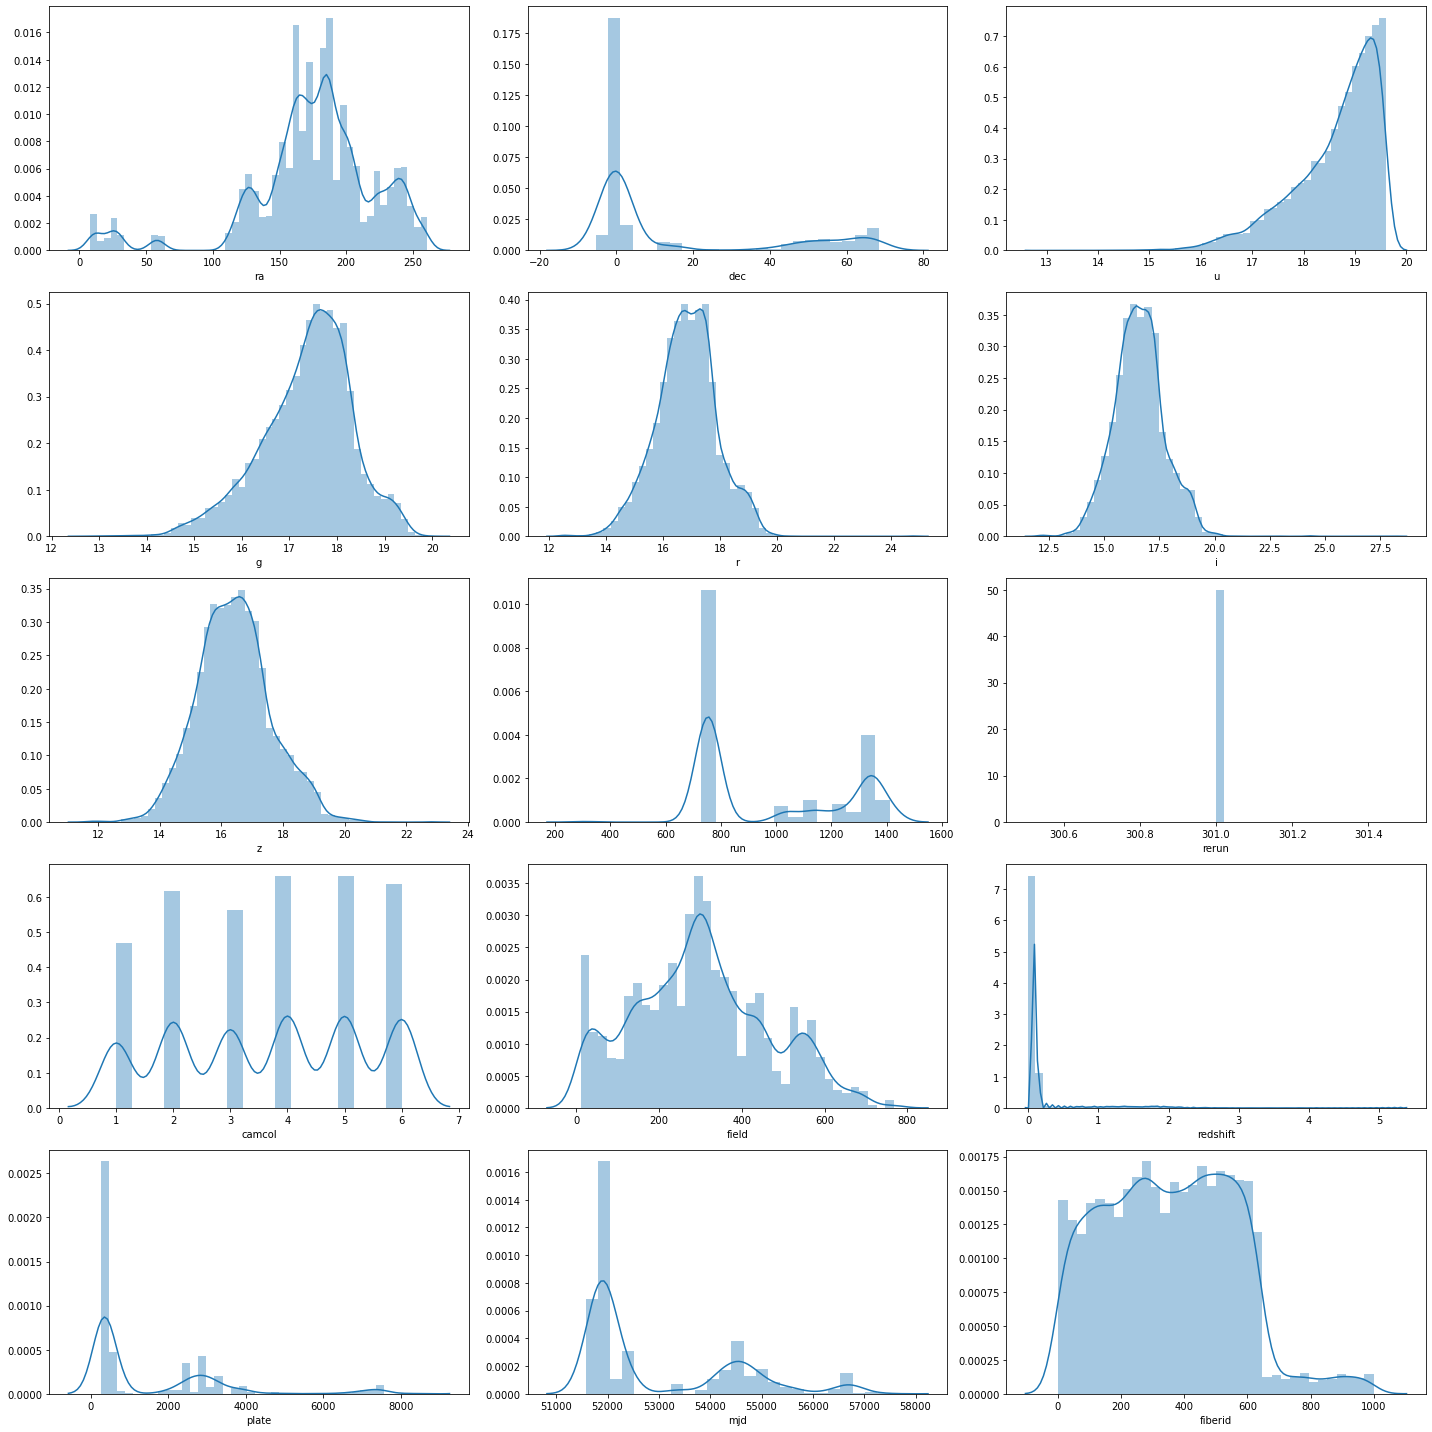

In [7]:
arr = list(ssdf.columns)
arr.remove('objid')    #This is simpy an ID, so nothing to gain from plotting.
arr.remove('specobjid')#This is simpy an ID, so nothing to gain from plotting.
arr.remove('class')
plt.figure(figsize=(20,20))
for i,j in enumerate(arr):
    plt.subplot(5,3,i+1)
    sns.distplot(ssdf[j])
    plt.tight_layout()
plt.show()

Many columns like ra(-ve skewed), dec(+ve skewed), u(-ve skewed), run(+ve skewed), redshift(+ve skewed), plate(+ve skewed) and mjd(+ve skewed) are highly skewed.

Some columns like r, i,z seems normally distributed.

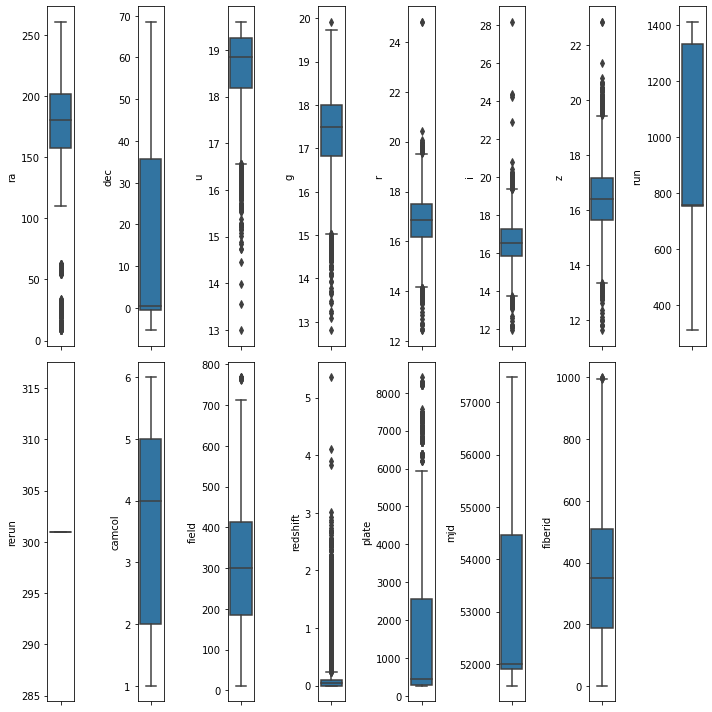

In [8]:
plt.figure(figsize=(10,10))
for i,j in enumerate(arr):
    plt.subplot(2,8,i+1)
    sns.boxplot(ssdf[j], orient="v")
    plt.tight_layout()
plt.show()

There are huge number of outliers in ra, u, g, r, i, z, redshift and plate columns.

There are some extreme outiers in r, i, redshift columns, which we can consider to remove. But since they are space data we can expect some weirdly humongous magnitudes.

In [9]:
ssdf['rerun'].value_counts() # Since its distplot and boxplots were very thin and seemingly had single value.

301    10000
Name: rerun, dtype: int64

We can drop rerun as it has only single value, so no dependency can be found in class and rerun.

# Scaling and transforming

In [10]:
ssdf.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794503
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [11]:
#Let's transform redshift using square root transformation.
ssdf['sqrt_redshift'] = np.sqrt(ssdf['redshift'])
ssdf['sqrt_redshift'].skew()

2.268173025011335

In [12]:
ssdf['sqrt_redshift'].value_counts()

0.000000    19
0.007944     4
0.006603     4
0.007861     4
0.006573     3
            ..
0.008746     1
0.016886     1
0.007396     1
0.375746     1
0.004701     1
Name: sqrt_redshift, Length: 7901, dtype: int64

In [13]:
ssdf['sqrt_redshift'].head()

0         NaN
1         NaN
2    0.350872
3         NaN
4    0.024297
Name: sqrt_redshift, dtype: float64

Transformation has caused more than 2000 rows to be converted into NaN, so it is not a god idea to transform it.

# Data cleaning

In [14]:
#Let's drop the ID and the rerun columns
ssdf.drop(["objid", "specobjid", "rerun"], 1, inplace=True)

In [15]:
ssdf.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,sqrt_redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8081.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400,0.283614
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149,0.312235
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000,0.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000,0.025704
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000,0.254690
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000,0.321331
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000,2.313840


Let's treat outliers from r, i and redshift columns, but we have transformed redshift columns, let's check it's boxplot again.

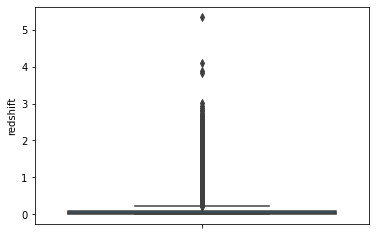

In [16]:
sns.boxplot(ssdf['redshift'], orient="v")

In [17]:
from scipy.stats import zscore

In [18]:
ssdf['z_r'] = zscore(ssdf['r'])
ssdf['z_i'] = zscore(ssdf['i'])
ssdf['z_redshift'] = zscore(ssdf['redshift'])
print("r zscoresminimum and maximum", ssdf['z_r'].min(), ssdf['z_r'].max())
print("r zscoresminimum and maximum", ssdf['z_i'].min(), ssdf['z_i'].max() )
print("r zscoresminimum and maximum",  ssdf['z_redshift'].min(), ssdf['z_redshift'].max())

r zscoresminimum and maximum -4.129734996460653 7.456209575776262
r zscoresminimum and maximum -4.060765033190162 10.156403617532334
r zscoresminimum and maximum -0.3803473736700301 13.402100794233082


In [19]:
# Count of records where z score is more than 5 in z_r column.
ssdf.loc[ssdf['z_r'] > 5, 'z_r'].count()

2

In [20]:
# Count of records where z score is more than 5 in z_i column.
ssdf.loc[ssdf['z_i'] > 5, 'z_i'].count()

5

In [21]:
# Count of records where z score is more than 5 in z_redshift column.
print(ssdf.loc[ssdf['z_redshift'] > 5, 'z_redshift'].count())
# Count of records where z score is more than 7 in z_redshift column.
print(ssdf.loc[ssdf['z_redshift'] > 7, 'z_redshift'].count())

74
7


There are no data in any of the columns among r, i and redshift that is less than -5, but there are some values which are greater than 5 in r an i and many records in redshift.
We have but less records in redshift where zscore is greater than 7. 

Let's remove outliers

In [22]:
ssdf_copy = ssdf[(ssdf['z_r'] < 5) & (ssdf['z_i'] < 5) & (ssdf['z_redshift'] < 7)]
print(ssdf.shape)
print(ssdf_copy.shape)
print(ssdf.shape[0] - ssdf_copy.shape[0],"rows removed in removing outliers.")

(10000, 19)
(9987, 19)
13 rows removed in removing outliers.


In [23]:
ssdf_copy.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'redshift', 'plate', 'mjd', 'fiberid', 'class', 'sqrt_redshift', 'z_r',
       'z_i', 'z_redshift'],
      dtype='object')

In [24]:
#Let's drop extra variables
ssdf_copy.drop(['sqrt_redshift', 'z_r', 'z_i', 'z_redshift'], 1, inplace=True)

In [25]:
ssdf_copy.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000
mean,175.499560,14.830200,18.620005,17.371339,16.838354,16.578387,16.420242,981.044458,3.647642,302.280865,0.141305,1458.998498,52941.889356,352.991990
std,47.795213,25.206275,0.827012,0.944855,1.061345,1.125912,1.199013,273.292552,1.665950,162.557437,0.376705,1787.139494,1509.848337,206.285634
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.349579,-0.539637,18.178080,16.814940,16.173050,15.853190,15.617695,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000,186.000000
50%,180.367565,0.402874,18.853220,17.494350,16.857360,16.553840,16.387120,756.000000,4.000000,299.000000,0.042589,441.000000,51997.000000,351.000000
75%,201.526594,35.596455,19.259235,18.009710,17.510540,17.255310,17.139720,1331.000000,5.000000,414.000000,0.092441,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,20.407270,20.793910,21.340410,1412.000000,6.000000,768.000000,2.832395,8410.000000,57481.000000,1000.000000


In [26]:
#Let's scale our data for better model performance
X = ssdf_copy.drop("class", 1)
Y = ssdf_copy["class"]

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [28]:
mms = MinMaxScaler()
ss = StandardScaler()

For the columns having negative values in them we will use standard scaler and for columns not having negative we will use minmax scaler

In [29]:
#We are making an array for columns having negative and an array for only positive columns
p_arr = []
n_arr = []
for i in X.columns:
    if X[i].min() < 0:
        n_arr.append(i)
    elif X[i].min() >= 0:
        p_arr.append(i)

print(n_arr,"\n", p_arr)

['dec', 'redshift'] 
 ['ra', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'plate', 'mjd', 'fiberid']


In [30]:
for i in n_arr:
    X[i] = ss.fit_transform(X[[i]])
for i in p_arr:
    X[i] = mms.fit_transform(X[[i]])

In [31]:
X.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,9987.000000,9.987000e+03,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9.987000e+03,9987.000000,9987.000000,9987.000000
mean,0.662042,-5.670619e-16,0.851777,0.642157,0.552525,0.523492,0.494330,0.609642,0.529528,0.384783,-1.609696e-17,0.146488,0.231050,0.352344
std,0.189176,1.000050e+00,0.125098,0.132715,0.133073,0.127269,0.123228,0.247548,0.333190,0.214739,1.000050e+00,0.219442,0.255776,0.206492
min,0.000000,-8.019370e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.861064e-01,0.000000,0.000000,0.000000
25%,0.590203,-6.097929e-01,0.784929,0.564005,0.469108,0.441518,0.411848,0.402174,0.200000,0.228534,-3.749114e-01,0.004298,0.054549,0.185185
50%,0.681310,-5.723991e-01,0.887054,0.659436,0.554908,0.520717,0.490926,0.405797,0.600000,0.380449,-2.620641e-01,0.021488,0.070981,0.350350
75%,0.765059,8.238939e-01,0.948469,0.731824,0.636804,0.600009,0.568274,0.926630,0.800000,0.532365,-1.297205e-01,0.281557,0.489582,0.509510
max,1.000000,2.131007e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.144113e+00,1.000000,1.000000,1.000000


In [32]:
for i in X.columns:
    print("Number of unique values in {} is:".format(i), len(X[i].unique()))

Number of unique values in ra is: 9987
Number of unique values in dec is: 9987
Number of unique values in u is: 9717
Number of unique values in g is: 9804
Number of unique values in r is: 9839
Number of unique values in i is: 9877
Number of unique values in z is: 9883
Number of unique values in run is: 23
Number of unique values in camcol is: 6
Number of unique values in field is: 703
Number of unique values in redshift is: 9624
Number of unique values in plate is: 486
Number of unique values in mjd is: 354
Number of unique values in fiberid is: 892


No columns is having single unique value.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([2, 2, 0, ..., 2, 0, 0])

In [35]:
Class = pd.DataFrame(Y)
Class = Class.rename(columns={0: 'class'})
Class

,class
0,2
1,2
2,0
3,2
4,2
...,...
9982,0
9983,0
9984,2
9985,0


In [36]:
df_copy = pd.concat([X, Class], 1)
df_copy.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
0,0.693832,-0.584824,0.980965,0.595954,0.440764,0.401982,0.371521,0.402174,0.6,0.338177,-0.375150,0.373281,0.566492,0.490490,2.0
1,0.694098,-0.583016,0.858250,0.620126,0.532215,0.513413,0.491376,0.402174,0.6,0.338177,-0.375272,0.006999,0.006268,0.540541,2.0
2,0.694422,-0.583377,0.967188,0.757385,0.632258,0.581020,0.533488,0.402174,0.6,0.339498,-0.048299,0.002579,0.075385,0.512513,0.0
3,0.695175,-0.586403,0.722499,0.534197,0.467617,0.456116,0.441312,0.402174,0.6,0.340819,-0.375420,0.373281,0.566492,0.509510,2.0
4,0.695225,-0.584314,0.689960,0.486538,0.502414,0.520839,0.514168,0.402174,0.6,0.340819,-0.373559,0.373281,0.566492,0.511512,2.0


In [37]:
#Correlation
dfcorr = df_copy.corr().sort_values(by='class', ascending=False)
dfcorr

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class
class,-0.030150,-0.049921,-0.083788,-0.063387,-0.034261,-0.011872,0.004223,-0.067839,-0.009620,0.015082,-0.042821,0.158414,0.182529,-0.007400,1.000000
mjd,-0.087258,0.066153,-0.167603,-0.092435,-0.008741,0.050701,0.096045,0.070405,0.025289,-0.086875,-0.072329,0.966851,1.000000,0.190408,0.182529
plate,-0.095857,0.088079,-0.128377,-0.054846,0.020143,0.073018,0.112438,0.093496,0.039921,-0.094278,-0.051687,1.000000,0.966851,0.230167,0.158414
field,0.594475,-0.131668,0.008029,0.013978,0.015594,0.016903,0.017338,-0.464091,-0.067891,1.000000,0.015313,-0.094278,-0.086875,-0.040672,0.015082
z,0.041723,0.055372,0.554656,0.880996,0.970578,0.991983,1.000000,0.047319,0.011110,0.017338,0.432608,0.112438,0.096045,0.069317,0.004223
fiberid,0.057678,0.155341,0.013007,0.048204,0.062156,0.068459,0.069317,0.139009,0.535836,-0.040672,0.047634,0.230167,0.190408,1.000000,-0.007400
camcol,-0.006247,0.114846,0.011124,0.010667,0.010503,0.011810,0.011110,0.152023,1.000000,-0.067891,0.002247,0.039921,0.025289,0.535836,-0.009620
i,0.043667,0.058875,0.618726,0.920508,0.988406,1.000000,0.991983,0.051523,0.011810,0.016903,0.447144,0.073018,0.050701,0.068459,-0.011872
ra,1.000000,0.003564,0.030792,0.043068,0.045920,0.043667,0.041723,-0.092711,-0.006247,0.594475,0.029168,-0.095857,-0.087258,0.057678,-0.030150
r,0.045920,0.061984,0.698056,0.961872,1.000000,0.988406,0.970578,0.056710,0.010503,0.015594,0.454461,0.020143,-0.008741,0.062156,-0.034261


class has positive correlation with mjd, plate, field and z

And negative correlation with fiberid, camcol, i, ra, r, redshift, dec, g, run, u

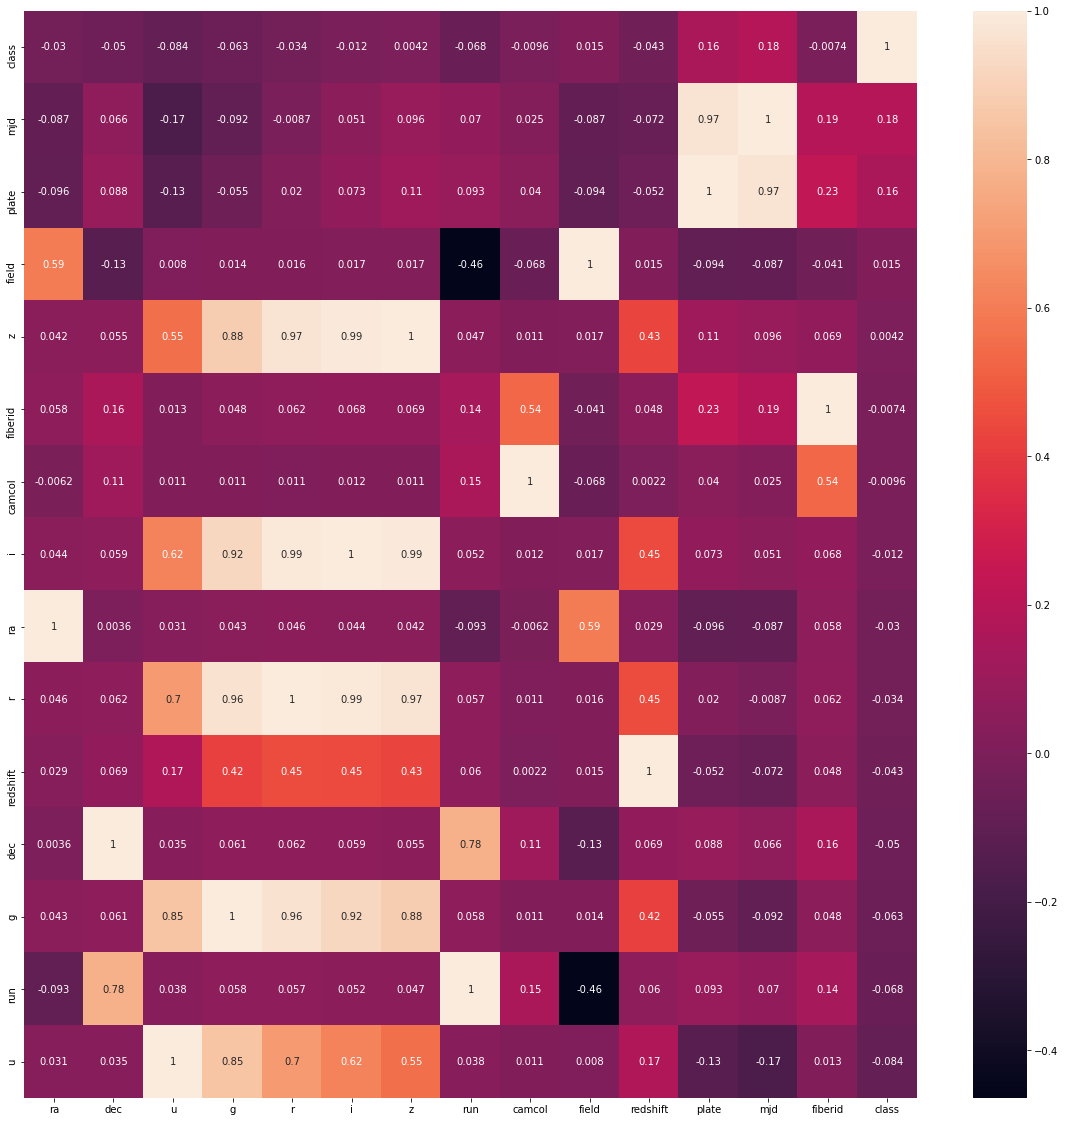

In [38]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr, annot=True)
plt.show()

plate and mjd are highly correlated to each other(97 percent), we can drop plate as it has slightly less correlation with class.

g has very high correlation with r and i, we can drop r and i as they have little less correlation with class as compared to g

In [39]:
X.drop(['plate', 'r', 'i'], 1, inplace=True)

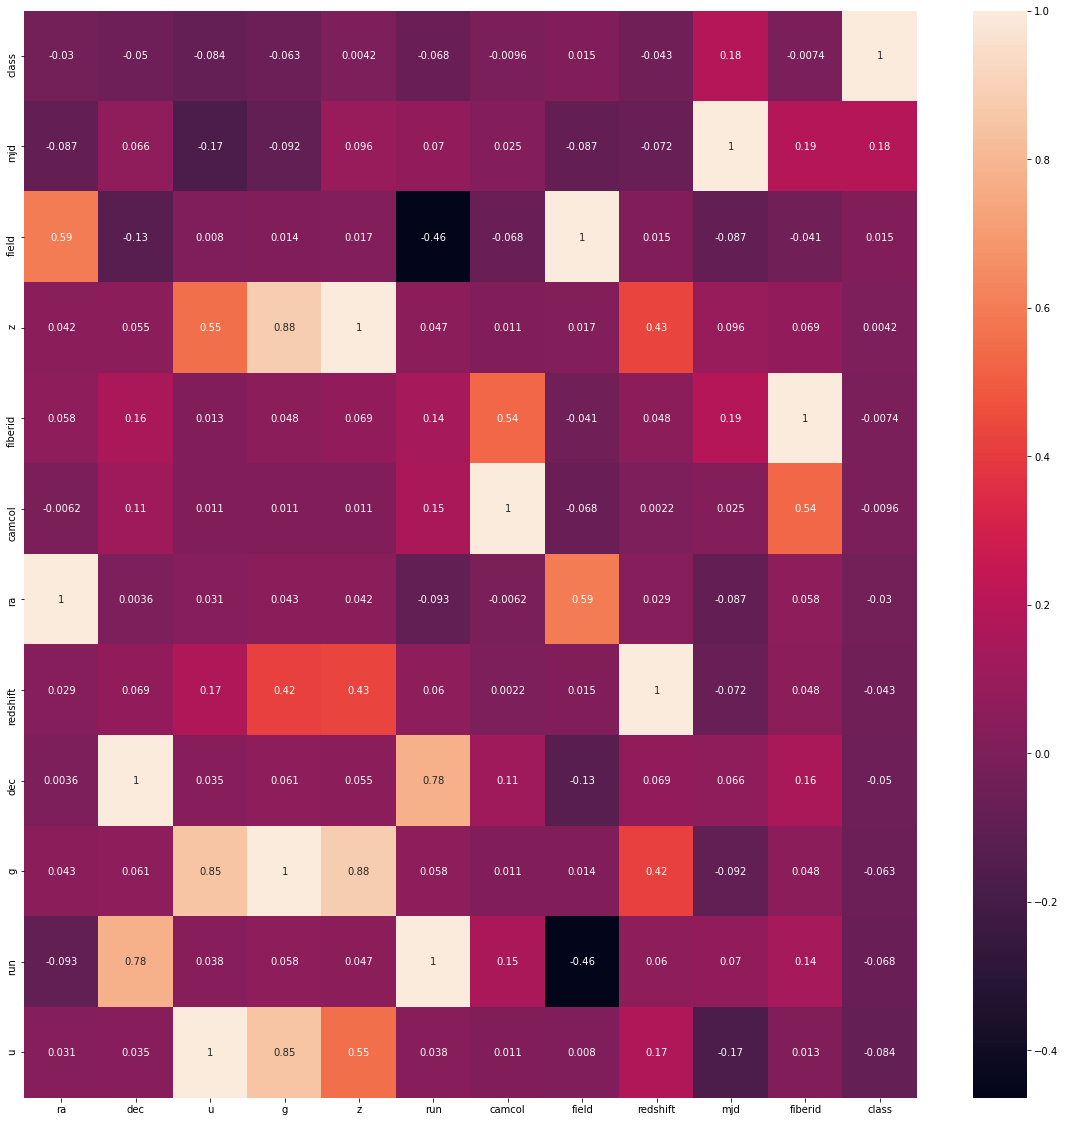

In [40]:
df_copy = pd.concat([X, Class], 1)
df_copy.head()

#Correlation
dfcorr = df_copy.corr().sort_values(by='class', ascending=False)
dfcorr

#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr, annot=True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7, stratify=Y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, f1_score, accuracy_score, roc_auc_score, make_scorer, average_precision_score

In [43]:
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnc = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
gbc = GradientBoostingRegressor()

In [44]:
models = [lm, dtc, knc, gnc, svc, rfc, gbc]
modelname = ['Logistic Regression', 'DecisionTree Classification',
             'KNeighbors Classification', 'Gaussian NB', 'SVC',
             'RandomForestClassifier', 'GradientBoostingRegressor']

In [45]:
score_table = pd.DataFrame(columns=['Model Name', 'Accuracy Score'])
for i,j in enumerate(models):
    j.fit(X_train, y_train)
    score_table.loc[i] = [modelname[i], j.score(X_test, y_test)]

score_table.sort_values(by='Accuracy Score', ascending=False)

,Model Name,Accuracy Score
5,RandomForestClassifier,0.987185
6,GradientBoostingRegressor,0.986123
1,DecisionTree Classification,0.985182
3,Gaussian NB,0.979175
4,SVC,0.975170
0,Logistic Regression,0.972767
2,KNeighbors Classification,0.940328


In [46]:
def rstate(model, Y):
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        rscore.append(model.score(x_test, y_test))
    return rscore.index(max(rscore))+1

In [47]:
#Classification Random State calculation
rfcRS = rstate(rfc, Y)
print("Random Forest Model best random state is: ",rfcRS)
dtcRS = rstate(dtc, Y)
print("Decision Tree Model best random state is: ",dtcRS)
gbcRS = rstate(gbc, Y)
print("Gradient Boosting Model best random state is: ",gbcRS)
gncRS = rstate(gnc, Y)
print("Naive Bayes Model best random state is: ",gncRS)
svcRS = rstate(svc, Y)
print("SVM Model best random state is: ",svcRS)
lmRS = rstate(lm, Y)
print("Logistic Model best random state is: ",lmRS)
kncRS = rstate(knc, Y)
print("KNN Model best random state is: ",kncRS)

Random Forest Model best random state is:  25
Decision Tree Model best random state is:  157
Gradient Boosting Model best random state is:  125
Naive Bayes Model best random state is:  26
SVM Model best random state is:  140
Logistic Model best random state is:  26
KNN Model best random state is:  198


In [50]:
#Parameters
rfcparams = {'criterion' : ['gini', 'entropy'], 'n_estimators' : range(50,80), 'random_state' : [rfcRS]}
dtcparams = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'min_samples_split' : range(10), 'random_state' : [dtcRS]}
gbcparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80), 'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : [gbcRS]}
gncparams = {'var_smoothing': np.logspace(0,-9, num=100)}
svcparams = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 'C' : range(50,80), 'random_state' : [svcRS]}
lmparams = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
kncparams = {'n_neighbors' : range(3,11), 'weights' : ['uniform', 'distance']}

In [51]:
rfcgs = GridSearchCV(rfc, rfcparams,return_train_score = False, cv = 5)
rfcgs.fit(X, Y)
rfcDF = pd.DataFrame(rfcgs.cv_results_)
rfcDF['mean_test_score'] = np.abs(rfcDF['mean_test_score'])
rfcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
36,"{'criterion': 'entropy', 'n_estimators': 56, '...",0.989887
31,"{'criterion': 'entropy', 'n_estimators': 51, '...",0.989786
35,"{'criterion': 'entropy', 'n_estimators': 55, '...",0.989786
37,"{'criterion': 'entropy', 'n_estimators': 57, '...",0.989786
30,"{'criterion': 'entropy', 'n_estimators': 50, '...",0.989686
41,"{'criterion': 'entropy', 'n_estimators': 61, '...",0.989686
33,"{'criterion': 'entropy', 'n_estimators': 53, '...",0.989686
34,"{'criterion': 'entropy', 'n_estimators': 54, '...",0.989686
32,"{'criterion': 'entropy', 'n_estimators': 52, '...",0.989586
38,"{'criterion': 'entropy', 'n_estimators': 58, '...",0.989586


In [52]:
dtcgs = GridSearchCV(dtc, dtcparams,return_train_score = False, cv = 5)
dtcgs.fit(X, Y)
dtcDF = pd.DataFrame(dtcgs.cv_results_)
dtcDF['mean_test_score'] = np.abs(dtcDF['mean_test_score'])
dtcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
34,"{'criterion': 'entropy', 'min_samples_split': ...",0.986783
36,"{'criterion': 'entropy', 'min_samples_split': ...",0.986682
14,"{'criterion': 'gini', 'min_samples_split': 7, ...",0.986382
32,"{'criterion': 'entropy', 'min_samples_split': ...",0.986282
12,"{'criterion': 'gini', 'min_samples_split': 6, ...",0.986182
30,"{'criterion': 'entropy', 'min_samples_split': ...",0.985982
38,"{'criterion': 'entropy', 'min_samples_split': ...",0.985881
28,"{'criterion': 'entropy', 'min_samples_split': ...",0.985781
18,"{'criterion': 'gini', 'min_samples_split': 9, ...",0.985681
26,"{'criterion': 'entropy', 'min_samples_split': ...",0.985581


In [54]:
#gbcgs = GridSearchCV(gbc, gbcparams,return_train_score = False, cv = 5)
#gbcgs.fit(X, Y)
#gbcDF = pd.DataFrame(gbcgs.cv_results_)
#gbcDF['mean_test_score'] = np.abs(gbcDF['mean_test_score'])
#gbcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [55]:
gncgs = GridSearchCV(gnc, gncparams,return_train_score = False, cv = 5)
gncgs.fit(X, Y)
gncDF = pd.DataFrame(gncgs.cv_results_)
gncDF['mean_test_score'] = np.abs(gncDF['mean_test_score'])
gncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
60,{'var_smoothing': 3.5111917342151275e-06},0.981975
62,{'var_smoothing': 2.310129700083158e-06},0.981875
63,{'var_smoothing': 1.873817422860383e-06},0.981875
57,{'var_smoothing': 6.579332246575683e-06},0.981775
58,{'var_smoothing': 5.336699231206313e-06},0.981775
...,...,...
4,{'var_smoothing': 0.43287612810830584},0.775893
3,{'var_smoothing': 0.533669923120631},0.752261
2,{'var_smoothing': 0.657933224657568},0.712117
1,{'var_smoothing': 0.8111308307896871},0.656255


In [56]:
svcgs = GridSearchCV(svc, svcparams,return_train_score = False, cv = 5)
svcgs.fit(X, Y)
svcDF = pd.DataFrame(svcgs.cv_results_)
svcDF['mean_test_score'] = np.abs(svcDF['mean_test_score'])
svcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
60,"{'C': 65, 'kernel': 'linear', 'random_state': ...",0.990187
88,"{'C': 72, 'kernel': 'linear', 'random_state': ...",0.990187
52,"{'C': 63, 'kernel': 'linear', 'random_state': ...",0.990187
56,"{'C': 64, 'kernel': 'linear', 'random_state': ...",0.990187
64,"{'C': 66, 'kernel': 'linear', 'random_state': ...",0.990187
...,...,...
3,"{'C': 50, 'kernel': 'sigmoid', 'random_state':...",0.768986
11,"{'C': 52, 'kernel': 'sigmoid', 'random_state':...",0.768986
23,"{'C': 55, 'kernel': 'sigmoid', 'random_state':...",0.768886
27,"{'C': 56, 'kernel': 'sigmoid', 'random_state':...",0.768886


In [57]:
lmgs = GridSearchCV(lm, lmparams,return_train_score = False, cv = 5)
lmgs.fit(X, Y)
lmDF = pd.DataFrame(lmgs.cv_results_)
lmDF['mean_test_score'] = np.abs(lmDF['mean_test_score'])
lmDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
13,"{'C': 1000.0, 'penalty': 'l2'}",0.989987
11,"{'C': 100.0, 'penalty': 'l2'}",0.987483
9,"{'C': 10.0, 'penalty': 'l2'}",0.983979
7,"{'C': 1.0, 'penalty': 'l2'}",0.971963
5,"{'C': 0.1, 'penalty': 'l2'}",0.942322
3,"{'C': 0.01, 'penalty': 'l2'}",0.865923
1,"{'C': 0.001, 'penalty': 'l2'}",0.804436
0,"{'C': 0.001, 'penalty': 'l1'}",NaN
2,"{'C': 0.01, 'penalty': 'l1'}",NaN
4,"{'C': 0.1, 'penalty': 'l1'}",NaN


In [58]:
kncgs = GridSearchCV(knc, kncparams,return_train_score = False, cv = 5)
kncgs.fit(X, Y)
kncDF = pd.DataFrame(kncgs.cv_results_)
kncDF['mean_test_score'] = np.abs(kncDF['mean_test_score'])
kncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
3,"{'n_neighbors': 4, 'weights': 'distance'}",0.930106
1,"{'n_neighbors': 3, 'weights': 'distance'}",0.930005
7,"{'n_neighbors': 6, 'weights': 'distance'}",0.929704
0,"{'n_neighbors': 3, 'weights': 'uniform'}",0.929505
11,"{'n_neighbors': 8, 'weights': 'distance'}",0.929003
9,"{'n_neighbors': 7, 'weights': 'distance'}",0.927400
15,"{'n_neighbors': 10, 'weights': 'distance'}",0.926599
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.925699
8,"{'n_neighbors': 7, 'weights': 'uniform'}",0.925498
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.924898


In [61]:
svcDF.iloc[60]
#SVC is the best working model with parameters as ('C': 65, 'kernel': 'linear', 'random_state': 140)

mean_fit_time                                                   0.30323
std_fit_time                                                   0.019301
mean_score_time                                              0.00958982
std_score_time                                              0.000801974
param_C                                                              65
param_kernel                                                     linear
param_random_state                                                  140
params                {'C': 65, 'kernel': 'linear', 'random_state': ...
split0_test_score                                              0.988488
split1_test_score                                              0.991992
split2_test_score                                              0.992489
split3_test_score                                               0.98698
split4_test_score                                              0.990986
mean_test_score                                                0

In [62]:
#X_train, X_test, y_train, y_test
svc_model = svcgs.fit(X_train, y_train).best_estimator_
svc_model.fit(X_train, y_train)
pred = svc_model.predict(X_test)
pred

array([0, 2, 2, ..., 2, 0, 2])

In [63]:
confusion_matrix(pred, y_test)

array([[1227,    4,    0],
       [   6,  207,    0],
       [  16,    0, 1037]], dtype=int64)

In [64]:
classification_report(pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1231\n           1       0.98      0.97      0.98       213\n           2       1.00      0.98      0.99      1053\n\n    accuracy                           0.99      2497\n   macro avg       0.99      0.98      0.99      2497\nweighted avg       0.99      0.99      0.99      2497\n'

In [65]:
accuracy_score(pred, y_test)

0.9895875050060072

In [67]:
import joblib

In [68]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(svc_model, filename)

['final_model.pkl']

In [69]:
# load the model from disk
load_model = joblib.load(filename)
result = load_model.score(X_test, y_test)
print(result)

0.9895875050060072
